<a href="https://colab.research.google.com/github/Elsacred02/assignment_2_advanced_machine_learning/blob/main/Problema3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

%matplotlib inline

In [11]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


X_train /= 255
X_test /= 255


Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [14]:
print('Size of the train set:', X_train.shape)

Size of the train set: (45000, 784)


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

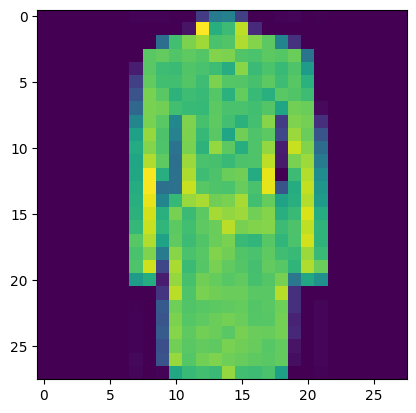

In [15]:
plt.imshow(X_val[0].reshape(28, 28))
Y_val[0]

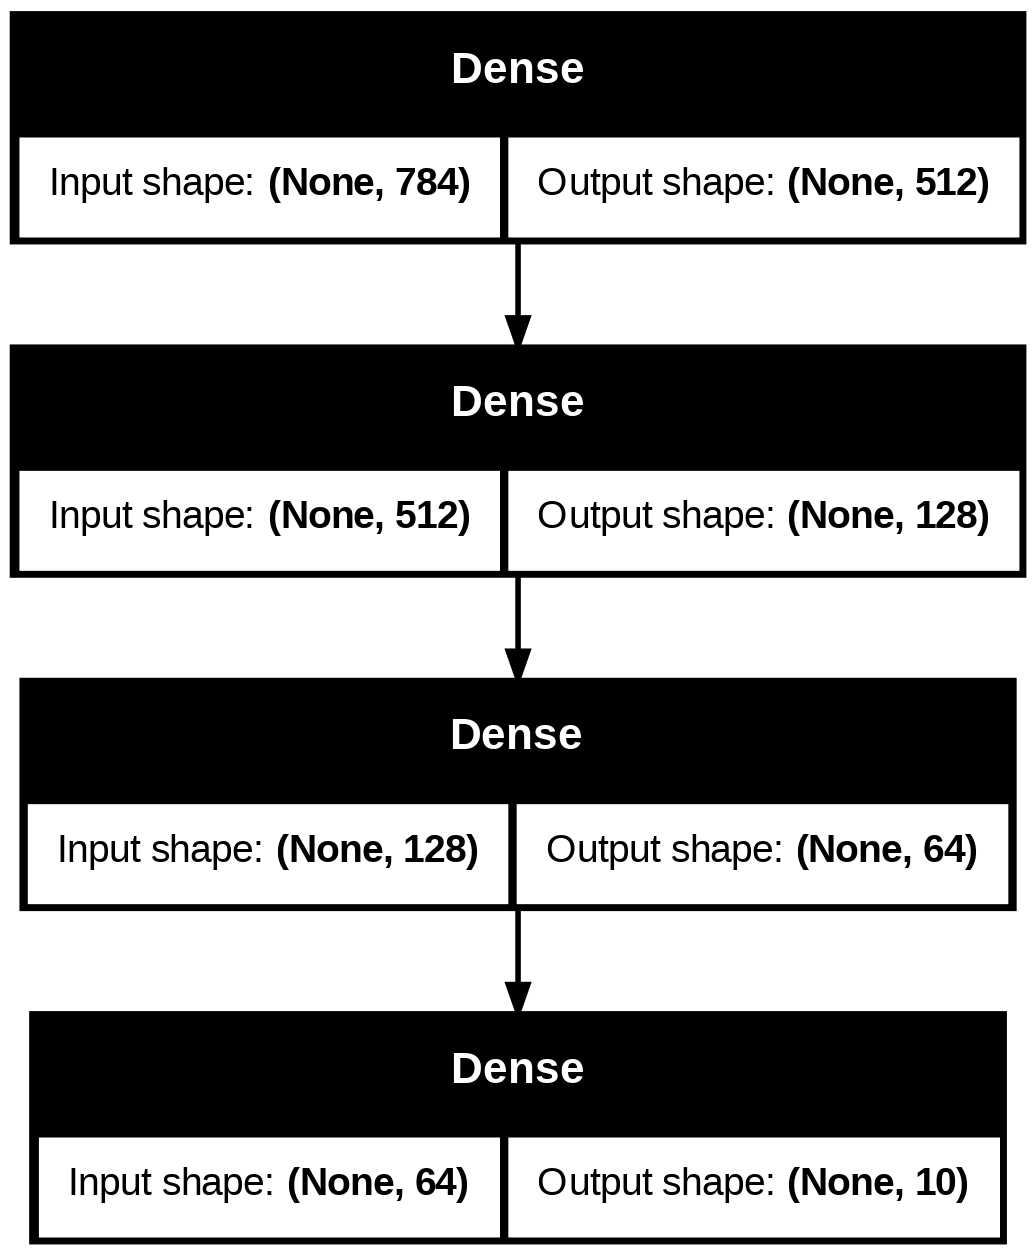

In [16]:
dims = X_train.shape[1]

nb_classes = 10

model = Sequential([
    Input(shape=(dims,)),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dense(nb_classes, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes = True)

In [17]:
n_epochs = 10
network_history = model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=n_epochs,
    validation_data=(X_val, Y_val),
    verbose=1
)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3045 - loss: 47.1455 - val_accuracy: 0.3150 - val_loss: 2.4327
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2971 - loss: 2.4112 - val_accuracy: 0.3087 - val_loss: 2.3348
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3402 - loss: 2.3135 - val_accuracy: 0.3851 - val_loss: 2.2565
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3920 - loss: 2.2378 - val_accuracy: 0.4323 - val_loss: 2.1680
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4120 - loss: 2.1614 - val_accuracy: 0.4157 - val_loss: 2.1191
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4537 - loss: 2.0843 - val_accuracy: 0.5058 - val_loss: 2.0266
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5057 - loss: 2.0146 - val_accuracy: 0.5175 - val_loss: 1.9727
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5222 - loss: 1.9682 - val_acc

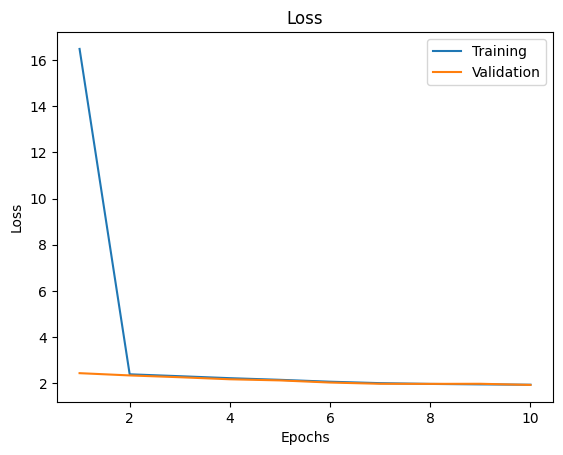

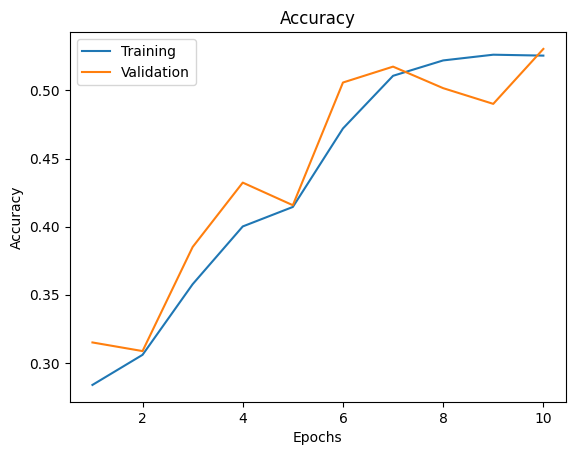

In [18]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(network_history)
plot_accuracy(network_history)